In [68]:
from webscraper.scrap_modules import my_NLP as myNLP 
import pickle
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Code - NLP

load cleaned dataframe

In [69]:
with open("webscraper/cleaned_data/cleaned_dataframe.pkl", "rb") as file:
    df = pickle.load(file)
    

In [70]:
df.head(2)

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword,language
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist,de
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en


#### Keyword Extraction 
https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/#:~:text=Textrank%20is%20a%20Python%20tool,compatible%20with%20the%20Spacy%20pipeline

In [71]:
import spacy 
import pytextrank 
import pandas as pd
import re

# !spacy download en_core_web_sm
# !spacy download de_core_news_sm

### first cleaning

In [72]:
nlp_df = pd.DataFrame(df) # create a new data frame

In [73]:
nlp_df

,id,title,company,city,posting_date,job_description,seniority_level,employment_type,job_function,industries,scraping_date,url,keyword,language
0,3685669741,Software Engineer Fullstack (m/w/d),Atruvia AG,"Aschheim, Bavaria, Germany",1 day ago,VollzeitWir sind der Digitalisierungspartner d...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Scientist,de
1,3719620327,Data Analyst - Business Intelligence,Almedia,"Berlin, Berlin, Germany",5 days ago,Almedia helps companies grow by promoting thei...,Mid-Senior level,Full-time,Analyst,"Technology, Information and Internet",2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
2,3720365801,(Junior) Data Engineer (m/f/d),Sandbox Interactive,"Berlin, Berlin, Germany",1 day ago,YOUR GAMEBuild and maintain the current data i...,Mid-Senior level,Full-time,Information Technology,Computer Games,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
3,3672508925,Financial Data Analyst (m/f/d),Ultramarin,"Berlin, Berlin, Germany",2 months ago,About The PositionWe are looking for a top-tie...,Mid-Senior level,Full-time,Information Technology,Financial Services,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
4,3695466781,Business Intelligence Analyst (f/m/d),Les Lunes,"Berlin, Berlin, Germany",4 weeks ago,Your missionAs a Business Intelligence Analyst...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Retail Apparel and Fashion,2023-09-24,https://www.linkedin.com/jobs/search?keywords=...,Data Analyst,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22074,3708677238,DevOps Engineer (m/w/d),dynexo GmbH,Germany,3 weeks ago,"dynexo, ein Unternehmen der DISION Technologie...",Mid-Senior level,Full-time,Information Technology,IT Services and IT Consulting,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Cloud Computing,de
22075,3726099021,Facility / Utilities Engineer,The PAC Group,"Munich, Bavaria, Germany",3 weeks ago,DescriptionPLEASE SUBMIT CV IN ENGLISH.The PAC...,Entry level,Full-time,Engineering and Information Technology,Facilities Services,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Research,en
22076,3717628705,Wissenschaftlicher Mitarbeiter / Postdoc (m/w/d),Universitätsklinikum Schleswig-Holstein,"Kiel, Schleswig-Holstein, Germany",6 days ago,Projekttitel: Resistenzmechanismen bei ALK-pos...,Entry level,Full-time,"Research, Analyst, and Information Technology",Hospitals and Health Care,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Statistics,de
22077,3705298823,Head of Support (m/w/d),"Machineseeker Group (Machineseeker, TruckScout...","Essen, North Rhine-Westphalia, Germany",3 weeks ago,"Du hast Lust, zu der Zufriedenheit unserer Kun...",Mid-Senior level,Full-time,Customer Service,IT Services and IT Consulting,2023-09-25,https://www.linkedin.com/jobs/search?keywords=...,Cloud Computing,de


In [74]:


tqdm.pandas(desc="Processing")
nlp_df['cp1_title'] = nlp_df["title"].progress_apply(myNLP.clean_up)

Processing: 100%|██████████| 22079/22079 [00:00<00:00, 147894.70it/s]


remove text in parentheses

In [75]:
pattern_to_extract = r'\((.*?)\)'

# Extract text within parentheses and put it in a new column
nlp_df['text_in_parentheses'] = nlp_df['cp1_title'].progress_apply(lambda x: re.findall(pattern_to_extract, x))

# Convert lists with only one element to that element, and keep lists for multiple elements
nlp_df['text_in_parentheses'] = nlp_df['text_in_parentheses'].progress_apply(lambda x: x[0] if len(x) == 1 else x)

# Remove the text within parentheses 
nlp_df['cp1_title'] = nlp_df['cp1_title'].progress_apply(lambda x: re.sub(pattern_to_extract, '', x).strip())


Processing: 100%|██████████| 22079/22079 [00:00<00:00, 650323.30it/s]


### Tokenize, lemmatize, remove stopwords

In [76]:
nlp_df['cp2_title'] = nlp_df['cp1_title'].progress_apply(myNLP.tokenize)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.stem_and_lemmatize)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.remove_stopwords)
nlp_df['cp2_title'] = nlp_df['cp2_title'].progress_apply(myNLP.re_blob) 


Processing: 100%|██████████| 22079/22079 [00:00<00:00, 991775.42it/s]


#### clean dataframe based on several rounds of inspecting word clouds 

combine keywords

In [99]:
nlp_df_clean = pd.DataFrame(nlp_df)

In [100]:
nlp_df_clean['cp2_title'] = nlp_df_clean['cp2_title'].progress_apply(myNLP.combine_keywords)

Processing: 100%|██████████| 22079/22079 [00:00<00:00, 23196.45it/s]


extract new job title with combined keywords

In [101]:
nlp_df_clean = nlp_df_clean.progress_apply(myNLP.extract_keywords, axis=1)

Processing: 100%|██████████| 22079/22079 [00:09<00:00, 2443.71it/s]


In [102]:
nlp_df_clean['new_job_title'].value_counts(dropna=False)

new_job_title
NaN                              14725
business_analyst                   691
software_developer                 685
sap_specialist                     621
specialist                         595
system_engineer                    572
data_engineer                      543
business_intelligence_analyst      428
data_analytics                     397
backend_developer                  346
data_scientist                     343
controlling                        337
full_stack                         336
data_analyst                       302
ai_engineer                        302
java_software_engineer             292
devops_engineer                    132
scientist_                         108
test_engineer                      104
data_architect                      98
database_datawarehouse              54
product_analyst                     22
research_scientist                  18
reporting_analyst                   14
it_systemadmincloud_engineer        11
analysis_en

extract job level information

In [81]:
nlp_df_clean = nlp_df_clean.progress_apply(myNLP.extract_level, axis=1)

Processing: 100%|██████████| 22079/22079 [00:08<00:00, 2562.22it/s]


In [82]:
nlp_df_clean['job_level'].value_counts(dropna=False)

job_level
NaN              12417
manager_level     3217
senior_level      3184
consultant        1873
student_level     1043
junior_level       345
Name: count, dtype: int64

In [83]:
nlp_df_clean = nlp_df_clean[~nlp_df_clean['job_level'].isin(['senior_level', 'student_level', 'manager_level'])]

In [84]:
nlp_df_clean.head(50)

,city,company,cp1_title,cp2_title,employment_type,id,industries,job_description,job_function,job_level,keyword,language,new_job_title,posting_date,scraping_date,seniority_level,text_in_parentheses,title,url
0,"Aschheim, Bavaria, Germany",Atruvia AG,software engineer fullstack,software_engineereer fullstack,Full-time,3685669741,IT Services and IT Consulting,VollzeitWir sind der Digitalisierungspartner d...,Engineering and Information Technology,NaN,Data Scientist,de,NaN,1 day ago,2023-09-24,Entry level,[],Software Engineer Fullstack (m/w/d),https://www.linkedin.com/jobs/search?keywords=...
1,"Berlin, Berlin, Germany",Almedia,data analyst business intelligence,data_analyst business_intelligence_analyst,Full-time,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,NaN,Data Analyst,en,business_intelligence_analyst,5 days ago,2023-09-24,Mid-Senior level,[],Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...
2,"Berlin, Berlin, Germany",Sandbox Interactive,data engineer,data_engineer,Full-time,3720365801,Computer Games,YOUR GAMEBuild and maintain the current data i...,Information Technology,NaN,Data Analyst,en,data_engineer,1 day ago,2023-09-24,Mid-Senior level,junior,(Junior) Data Engineer (m/f/d),https://www.linkedin.com/jobs/search?keywords=...
3,"Berlin, Berlin, Germany",Ultramarin,financial data analyst,financial data_analyst,Full-time,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,NaN,Data Analyst,en,data_analyst,2 months ago,2023-09-24,Mid-Senior level,[],Financial Data Analyst (m/f/d),https://www.linkedin.com/jobs/search?keywords=...
4,"Berlin, Berlin, Germany",Les Lunes,business intelligence analyst,business_intelligence_analyst,Full-time,3695466781,Retail Apparel and Fashion,Your missionAs a Business Intelligence Analyst...,"Research, Analyst, and Information Technology",NaN,Data Analyst,en,business_intelligence_analyst,4 weeks ago,2023-09-24,Mid-Senior level,[],Business Intelligence Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...
5,"Berlin, Berlin, Germany",Orange Quarter,data analyst,data_analyst,Full-time,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,NaN,Data Analyst,en,data_analyst,5 months ago,2023-09-24,Entry level,[],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
6,"Berlin, Berlin, Germany",Orange Quarter,data analyst,data_analyst,Full-time,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,NaN,Data Analyst,en,data_analyst,5 months ago,2023-09-24,Entry level,[],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
7,"Berlin, Berlin, Germany",Enter,bi analyst,business_intelligence_analystanalyst,Full-time,3704916810,Architecture and Planning,Build the future with Enter.Our mission is to ...,Information Technology,NaN,Data Analyst,en,business_intelligence_analyst,3 weeks ago,2023-09-24,Mid-Senior level,[],BI Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...
8,"Berlin, Berlin, Germany",Orange Quarter,data analyst,data_analyst,Full-time,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,NaN,Data Analyst,en,data_analyst,5 months ago,2023-09-24,Entry level,[],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
10,"Berlin, Berlin, Germany",kevin.,product data analyst,product data_analyst,Full-time,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,NaN,Data Analyst,en,data_analyst,1 month ago,2023-09-24,Mid-Senior level,[],Product Data Analyst,https://www.linkedin.com/jobs/search?keywords=...


In [85]:
# # manual selection from wordcloud
# words_to_find = []


# nlp_df_clean['exclude'] = nlp_df_clean['cp1_title'].apply(lambda x: 'True' if any(word.lower() in x.lower() for word in words_to_find) else 'False')


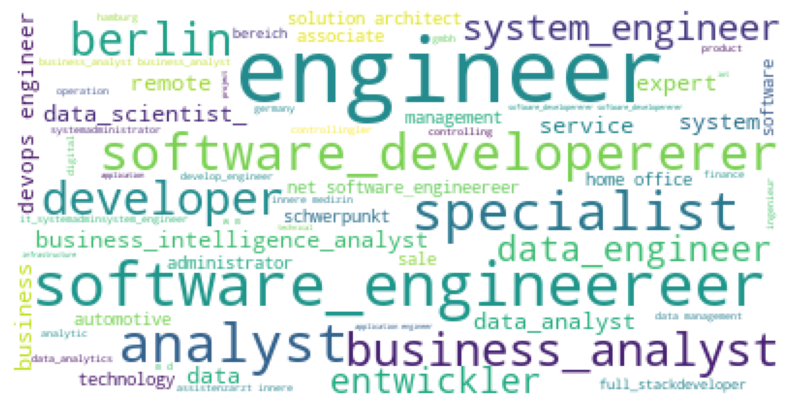

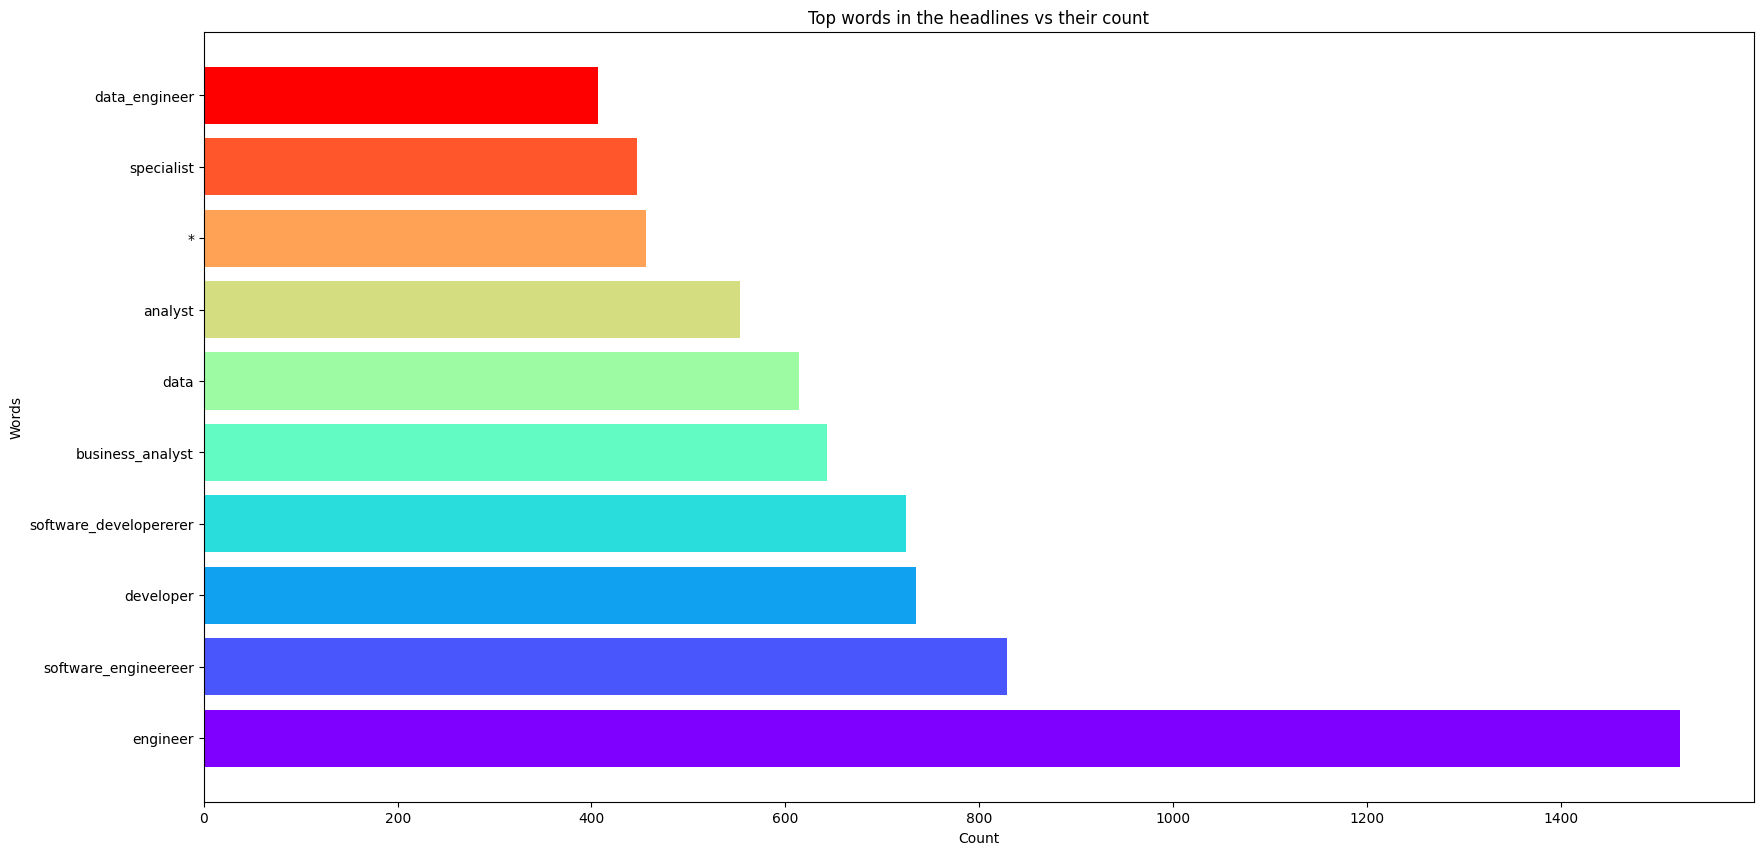

In [86]:
myNLP.word_cloud(nlp_df_clean, 'cp2_title')

split dataframe

In [87]:
print(nlp_df_clean.shape)
nlp_df_split = nlp_df_clean[nlp_df_clean['new_job_title'].isna()]

print(nlp_df_split.shape)

all_text = nlp_df_split['cp2_title']

bag = " ".join(all_text) # combining all job title 

(14635, 19)
(9759, 19)


#### word cloud 

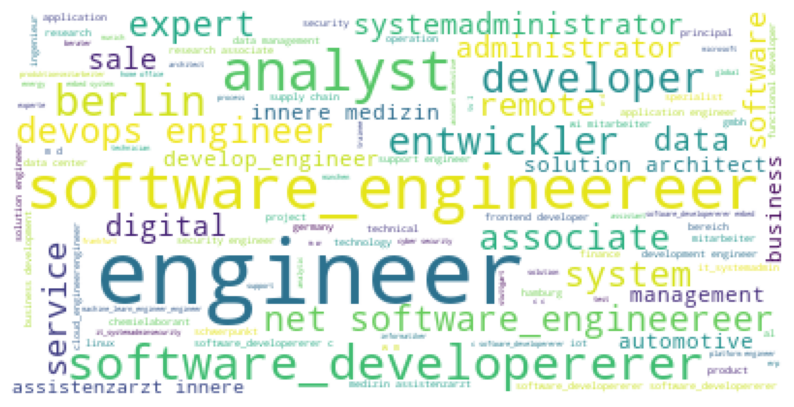

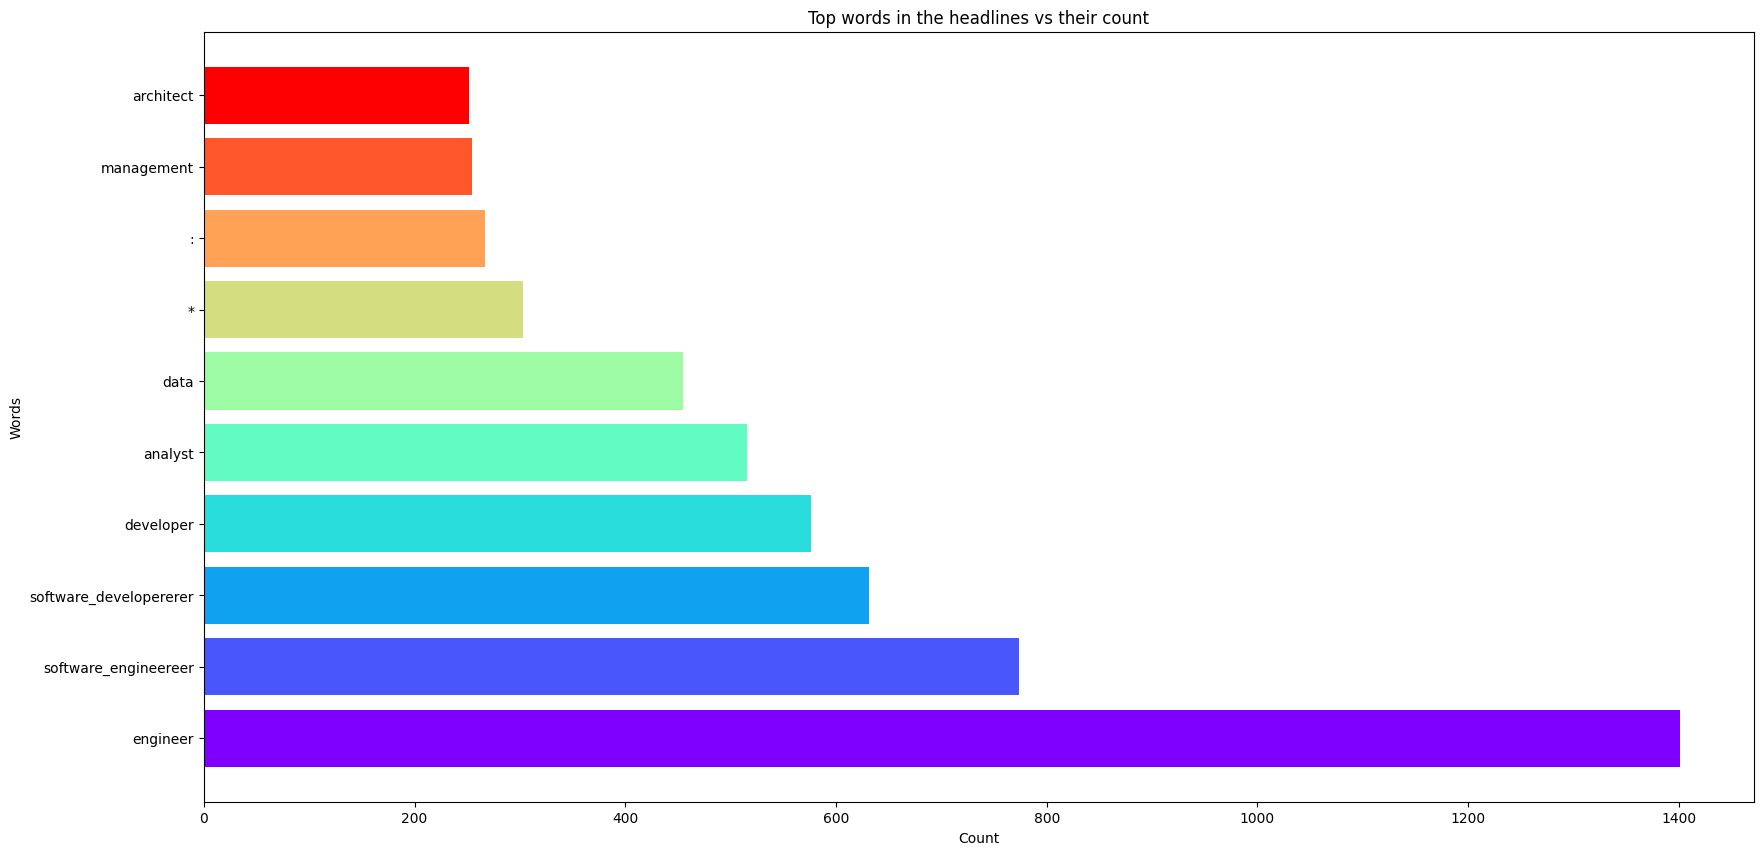

In [88]:
myNLP.word_cloud(nlp_df_split, 'cp2_title')

In [89]:
from keybert import KeyBERT


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Yake keyword extractor

In [90]:
import yake

kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(bag)

In [91]:
for kw in keywords:
    print(kw)

('engineer software', 3.240914876502951e-05)
('engineer', 4.130800586738706e-05)
('software', 4.249909909919579e-05)
('engineer devops engineer', 5.094055528962951e-05)
('developererer software', 6.43153208697263e-05)
('engineereer software', 6.966385919848425e-05)
('devops engineer software', 9.109349678717695e-05)
('engineereer', 9.15345869211458e-05)
('developer software', 0.00011515560524891433)
('net software', 0.00011927354711664475)
('engineer solution engineer', 0.00011952847805238044)
('software quality engineer', 0.00012323676793889066)
('devops engineer', 0.00013718893517434828)
('developererer', 0.0001390224133627653)
('application engineer software', 0.00014158004465055925)
('security engineer software', 0.00016247482600914524)
('frontend developer software', 0.00017028373057214068)
('engineer embed software', 0.00018574101956258702)
('software development engineer', 0.00018628810183579384)
('development engineer software', 0.00018628810183579384)


In [92]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

feature extraction:TF-IDF (Term Frequency-Inverse Document Frequency) 

In [93]:
# Step 1: Data Preprocessing
## Lowercasing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize_stemm_vectorize(df):
## Tokenization and Removing Stop Words
    stop_words = set(stopwords.words('english'))
    df['cp2_title'] = df['cp2_title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

    ## Stemming
    stemmer = PorterStemmer()
    df['cp2_title'] = df['cp2_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Step 2: Text Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['cp2_title'])
    
    return X

X = tokenize_stemm_vectorize(nlp_df_split)




# Step 4: Evaluation
# Manually evaluate the clusters or use metrics

# Step 5: Visualization (Optional)
# Use Matplotlib or Seaborn to visualize clusters

C:\Users\Domen\AppData\Local\Temp\ipykernel_101048\1906324698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp2_title'] = df['cp2_title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
C:\Users\Domen\AppData\Local\Temp\ipykernel_101048\1906324698.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp2_title'] = df['cp2_title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))


In [94]:
# # Elbow Method to find optimal K
# inertia = []
# for i in range(1, 30):
#     kmeans = KMeans(n_clusters=i, init='k-means++')
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

Model: KMeans

In [95]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize variables
silhouette_scores = []
inertia = []
# Loop through different numbers of clusters
for i in range(20, 30):  # Start from 2 as silhouette_score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append to the list
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg}")


For n_clusters = 20, the silhouette score is 0.06941887752454665
For n_clusters = 21, the silhouette score is 0.07976189091193517
For n_clusters = 22, the silhouette score is 0.07222321666291008
For n_clusters = 23, the silhouette score is 0.07056645322814825
For n_clusters = 24, the silhouette score is 0.07822366158714689
For n_clusters = 25, the silhouette score is 0.08510797165672679
For n_clusters = 26, the silhouette score is 0.07878255962422041
For n_clusters = 27, the silhouette score is 0.08415936569972131
For n_clusters = 28, the silhouette score is 0.08487249492604561
For n_clusters = 29, the silhouette score is 0.07595926297514566


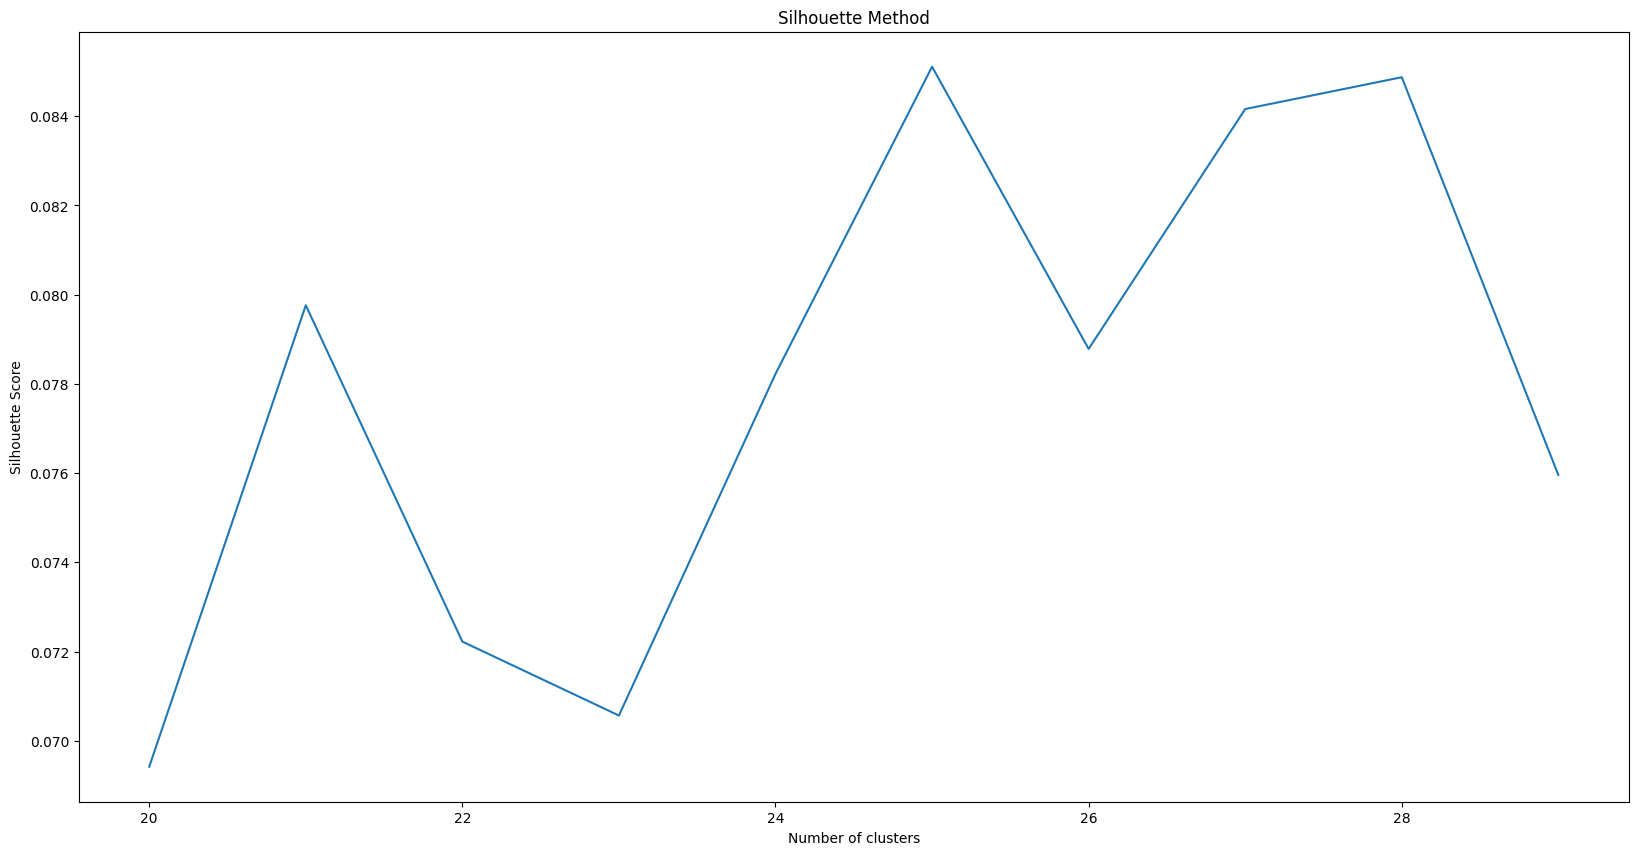

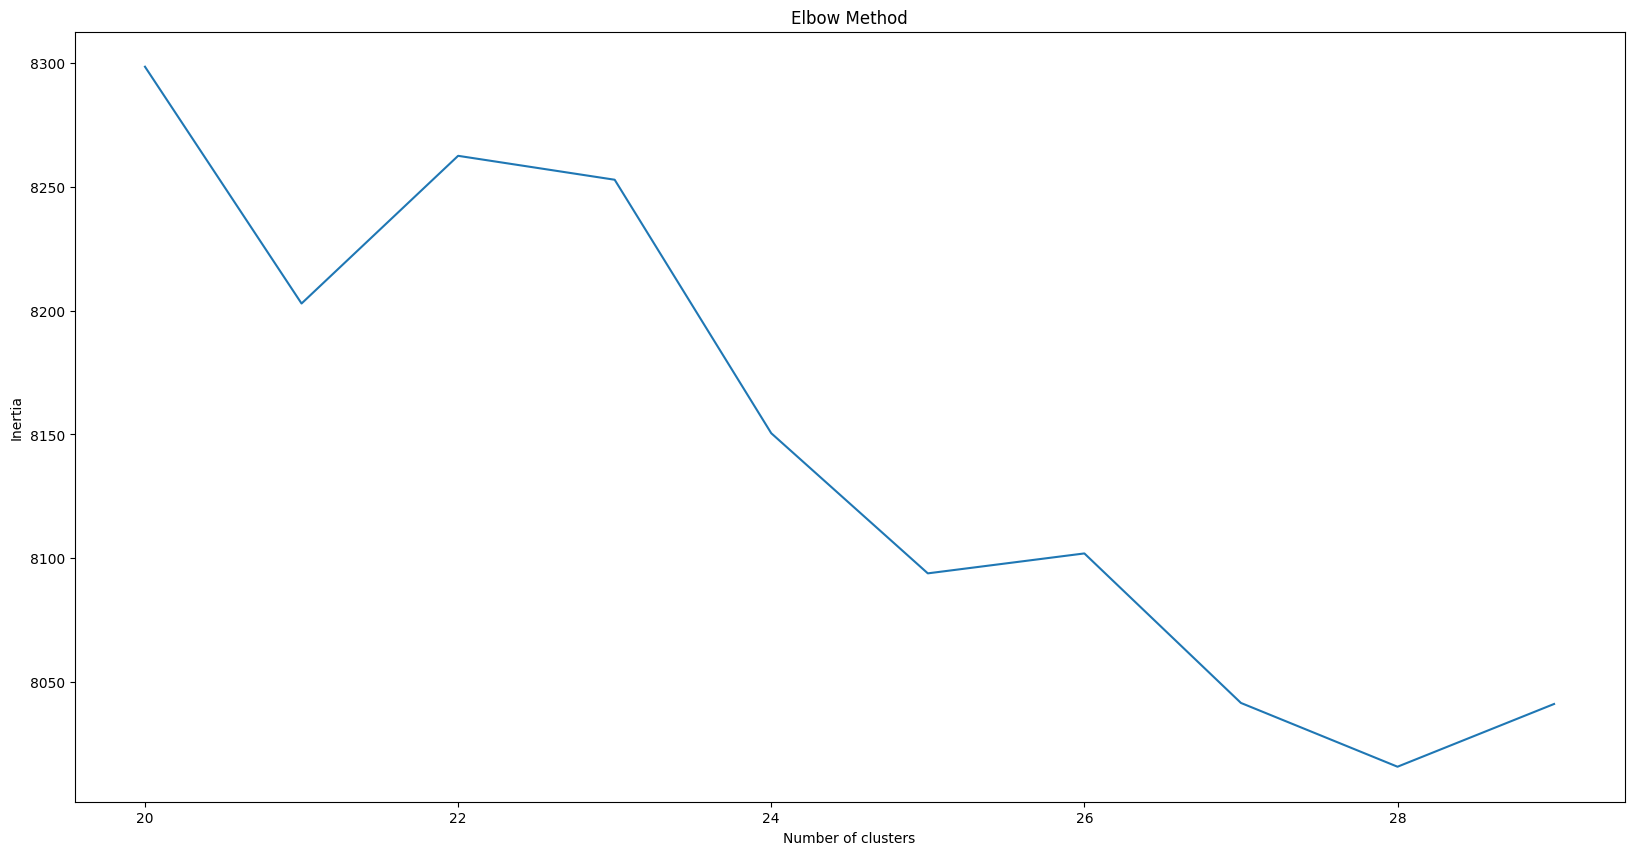

In [96]:

# Plotting the silhouette scores
plt.plot(range(20, 30), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



plt.plot(range(20, 30), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [97]:
# Step 3: Clustering
kmeans = KMeans(n_clusters=27)  # Assuming 5 clusters
kmeans.fit(X)
nlp_df_split['cluster_kmeans'] = kmeans.labels_


C:\Users\Domen\AppData\Local\Temp\ipykernel_101048\1744792117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df_split['cluster_kmeans'] = kmeans.labels_


In [98]:
kmean_groups = nlp_df_split[['id', 'cp2_title', 'cluster_kmeans']]

with open("webscraper/model_data/kmean_groups.csv", "wb") as file:
    kmean_groups.to_csv(file)

PermissionError: [Errno 13] Permission denied: 'webscraper/model_data/kmean_groups.csv'

In [ ]:
kmean_model1 = {"dataframe":nlp_df_split,
                "X":X,
                'Prediction':kmean_groups}

<!-- Model: naive_bayes / MultinomialNB -->

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# clf = MultinomialNB()
# clf.fit(X)
# nlp_df_split['cluster_naive_bayes'] = clf.predict(X)



manually reserach: filter specific words 

In [ ]:
filtered_df = nlp_df_split[nlp_df_split['cp2_title'].str.contains("data analytics", case=False)]
filtered_df['cp2_title'].tolist()
